In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]

small_index = np.array(np.where(meta[:,1]<1000)[0])
large_index = np.array(np.where(meta[:,1]>5000)[0])

balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])

In [3]:
[len(bin_index),len(multi_index),len(small_index),len(large_index),len(inbalance_index),len(balance_index)]

[91, 75, 95, 26, 24, 137]

In [4]:
edb = np.load("outbd.npy")

In [5]:
edb.shape

(166, 2, 6)

In [6]:
edefault = edb[:,0,:]
ebest = edb[:,1,:]

In [7]:
edefault.shape

(166, 6)

In [8]:
#"bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"
pd_ed = pd.DataFrame(edefault,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_eb = pd.DataFrame(ebest,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_ed.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.199891,0.174406,0.006287,0.001968,0.251595,0.044173
std,0.188542,0.128733,0.029950,0.006235,0.179509,0.041335
min,0.000000,0.000238,0.000000,0.000000,0.000238,0.000062
25%,0.056787,0.069187,0.000000,0.000000,0.102707,0.012718
50%,0.146325,0.149483,0.000000,0.000000,0.226445,0.033190
75%,0.284929,0.269088,0.000000,0.000000,0.381142,0.060098
max,1.000000,0.574417,0.211480,0.038261,0.806167,0.224312


In [9]:
pd_eb.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.195648,0.147161,0.016340,0.003763,0.234296,0.041758
std,0.191044,0.126485,0.054362,0.008675,0.183963,0.040021
min,0.000000,0.000189,0.000000,0.000000,0.000189,0.000056
25%,0.045758,0.044867,0.000000,0.000000,0.076751,0.011252
50%,0.141881,0.117400,0.000000,0.000000,0.198125,0.031233
75%,0.278125,0.202238,0.000154,0.000594,0.365517,0.061367
max,1.000000,0.545882,0.418750,0.050435,0.806917,0.204848


# Standard set

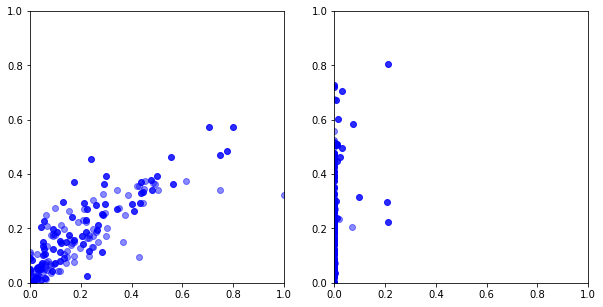

In [10]:
bias = edefault[:,0]
var = edefault[:,1]
train_err = edefault[:,2]
train_std = edefault[:,3]
test_err = edefault[:,4]
test_std = edefault[:,5]


##rankdata is larger if the stat is larger
alpha = 0.25+0.75*stats.rankdata(meta[:,4])/166
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,166):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
ax2 = plt.subplot(122)
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,166):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")

plt.show()

#plt.scatter(bias,var,alpha=0.6)



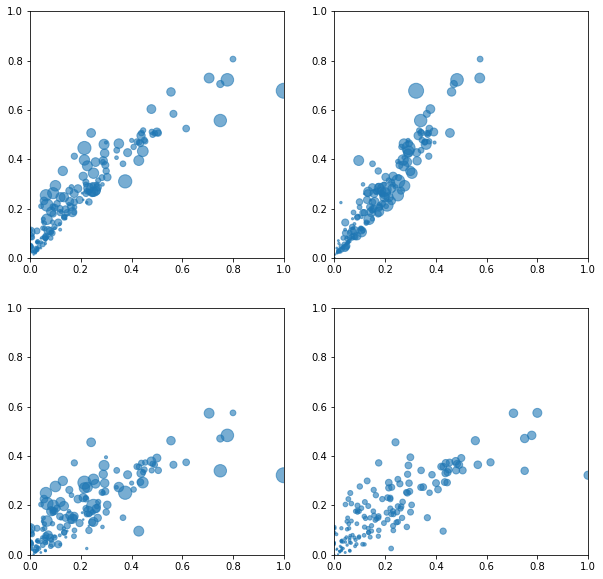

In [11]:
fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)


plt.show()

# Best set

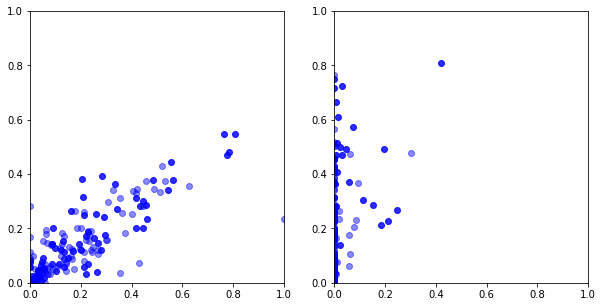

In [12]:
bias = ebest[:,0]
var = ebest[:,1]
train_err = ebest[:,2]
train_std = ebest[:,3]
test_err = ebest[:,4]
test_std = ebest[:,5]


##rankdata is larger if the stat is larger
alpha = 0.25+0.75*stats.rankdata(meta[:,4])/166
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,166):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
ax2 = plt.subplot(122)
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,166):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")

plt.show()

#plt.scatter(bias,var,alpha=0.6)




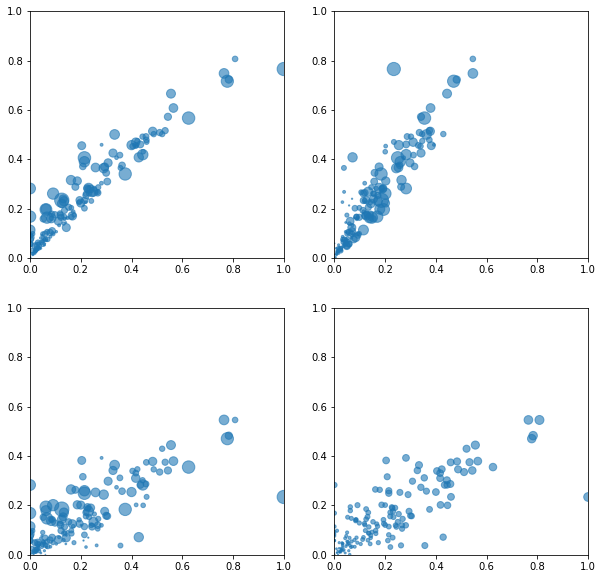

In [13]:
fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)


plt.show()

# Comparison

In [14]:
gap = ebest - edefault
gap_bias = ebest[:,0] - edefault[:,0]
gap_variance = ebest[:,1] - edefault[:,1]
gap_loss = ebest[:,4] - edefault[:,4]

In [15]:
pd.DataFrame(gap,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"]).describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,-0.004243,-0.027245,0.010053,0.001795,-0.017299,-0.002415
std,0.032984,0.035582,0.037898,0.006287,0.030940,0.006715
min,-0.187500,-0.149315,0.000000,-0.000480,-0.156027,-0.049830
25%,-0.009975,-0.038729,0.000000,0.000000,-0.025452,-0.005384
50%,0.000000,-0.017511,0.000000,0.000000,-0.010731,-0.001379
75%,0.002017,-0.002130,0.000000,0.000000,-0.000447,0.000116
max,0.086957,0.061500,0.303708,0.050435,0.088000,0.019436


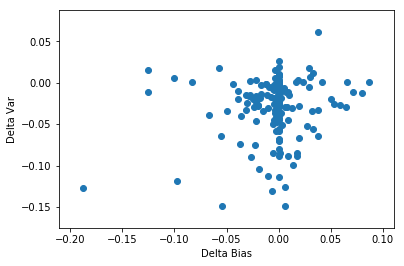

In [16]:
plt.scatter(gap_bias,gap_variance)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.savefig("pic1.5.1.jpg")

Text(0,0.5,'Delta Loss')

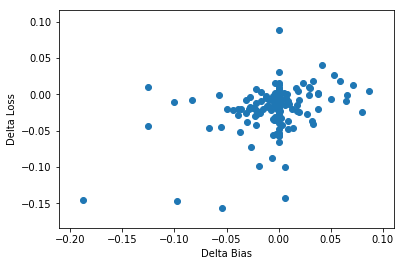

In [17]:
plt.scatter(gap_bias,gap_loss)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Loss")

Text(0,0.5,'Delta Loss')

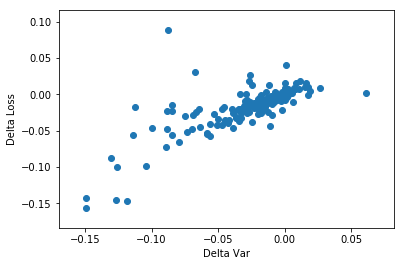

In [18]:
plt.scatter(gap_variance,gap_loss)
plt.xlabel("Delta Var")
plt.ylabel("Delta Loss")

In [19]:
print(stats.ttest_ind(gap_bias,[0]*len(gap_bias)))
print(stats.ttest_ind(gap_variance,[0]*len(gap_variance)))
print(stats.ttest_ind(gap_loss,[0]*len(gap_loss)))
print(stats.ttest_ind(gap_bias[large_index],[0]*len(gap_bias[large_index])))
print(stats.ttest_ind(gap_variance[large_index],[0]*len(gap_variance[large_index])))
print(stats.ttest_ind(gap_loss[large_index],[0]*len(gap_loss[large_index])))
print(stats.ttest_ind(gap_bias[small_index],[0]*len(gap_bias[small_index])))

print(stats.ttest_ind(gap_variance[small_index],[0]*len(gap_variance[small_index])))

print(stats.ttest_ind(gap_loss[small_index],[0]*len(gap_loss[small_index])) )

Ttest_indResult(statistic=-1.6573797944999118, pvalue=0.09839302993670936)
Ttest_indResult(statistic=-9.865193062725025, pvalue=2.750904403507834e-20)
Ttest_indResult(statistic=-7.203568101021653, pvalue=4.004439417837181e-12)
Ttest_indResult(statistic=-1.9768816211517977, pvalue=0.05358282800311754)
Ttest_indResult(statistic=-5.250647712619773, pvalue=3.110777851119545e-06)
Ttest_indResult(statistic=-5.439759034375252, pvalue=1.6019110993364684e-06)
Ttest_indResult(statistic=-1.1865202590192512, pvalue=0.2369141571664433)
Ttest_indResult(statistic=-7.020528214455893, pvalue=3.9099808766562496e-11)
Ttest_indResult(statistic=-4.009227125030367, pvalue=8.778008053316686e-05)


In [20]:
## can dereasing variance, as well as the loss, but not for bias 
## We may check under which case it can decrease bias

### may decrease bias under large index